<a href="https://colab.research.google.com/github/Edgar121207/MSCI-151/blob/main/CW4_GOURP_CODE_Edgar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STABLE**

In [ ]:
import pandas as pd

excel_file_path = '/content/sample_data/stable data.xlsx'
df = pd.read_excel(excel_file_path)
display(df.head())

,id,Profitability,debt,RnD,Firm Age,Firm Size,CEO Experience,foreign sales,CEO education,CEO Gender,marketing,product sentiment,politician on board,POB catagorical
0,1,0.02,23.76,53.09,3.43,21.22,2,9.16,2,0,0.801335,0.284925,0.158781,0
1,2,3.99,41.85,45.30,3.22,21.83,4,41.42,1,0,0.385019,0.579495,0.294679,0
2,3,41.98,61.84,51.16,3.18,20.54,3,5.88,3,1,0.839350,0.619687,0.552742,1
3,4,8.48,25.61,115.49,3.26,20.59,3,11.08,2,0,0.643304,0.048441,0.909262,1
4,5,-1.94,74.24,13.57,3.26,18.73,3,24.61,1,0,0.747535,0.378619,0.436101,0


In [ ]:
from sklearn.model_selection import train_test_split

# Define X and y (originally from cell 6282f3a7, included here for immediate execution)
features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender','marketing', 'product sentiment', 'POB catagorical']
X = df[features]
y = df['Profitability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'marketing', 'product sentiment', 'POB catagorical']
X = df[features]
y = df['Profitability']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
display(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 108.56464222799997


'R-squared (R2) Score: -1.3577282151354'

Feature Importance

In [ ]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the features by importance
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Print the feature importance scores
print("Feature Importance Scores:")
display(sorted_feature_importance)

Feature Importance Scores:


,0
debt,0.300790
CEO Gender,0.155771
Firm Size,0.142648
RnD,0.108284
Firm Age,0.060365
CEO Experience,0.053216
marketing,0.052356
foreign sales,0.048258
product sentiment,0.038825
CEO education,0.021732


In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

# Initialize LASSO model (you might need to adjust alpha)
lasso = Lasso(alpha=0.1) # alpha is the regularization strength

# Fit LASSO model
lasso.fit(X, y)

# Get the coefficients
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Identify selected features (non-zero coefficients)
selected_features_lasso = lasso_coefficients[lasso_coefficients != 0].index.tolist()

print("LASSO regularization:")
display(lasso_coefficients)

LASSO regularization:


,0
debt,-0.191118
RnD,0.030952
Firm Age,-2.747879
Firm Size,0.709311
CEO Experience,2.020387
foreign sales,-0.014693
CEO education,2.189313
CEO Gender,10.048181
marketing,3.942607
product sentiment,-1.566340


##LASSO Regularisation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Define features and target
features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'marketing', 'product sentiment', 'POB catagorical']
X = df[features]
y = df['Profitability']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort features by importance
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Print feature importance scores
print("LASSO Feature Importance Scores:")
display(sorted_feature_importance)

LASSO Feature Importance Scores:


,0
debt,0.300790
CEO Gender,0.155771
Firm Size,0.142648
RnD,0.108284
Firm Age,0.060365
CEO Experience,0.053216
marketing,0.052356
foreign sales,0.048258
product sentiment,0.038825
CEO education,0.021732


##LASSO Coefficient

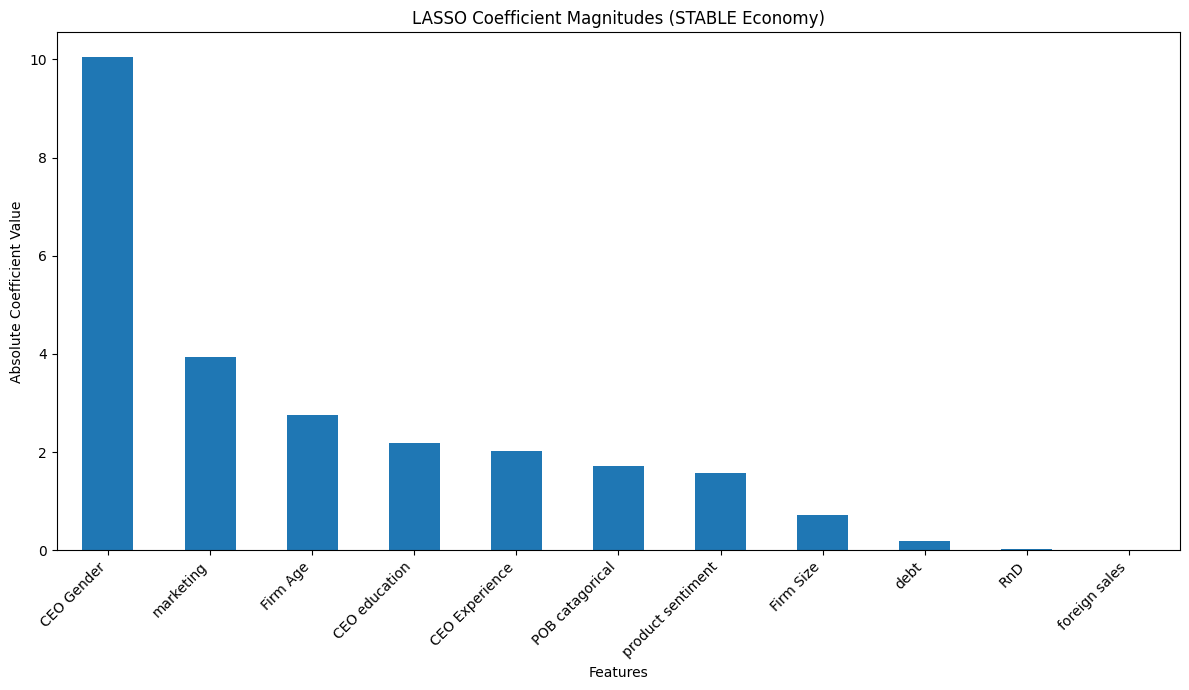

In [ ]:
import matplotlib.pyplot as plt

# Ensure lasso_coefficients is available from the 'STABLE' dataset (from cell nd10okqHvCjD)
# If it's not the latest, rerun the LASSO cell for 'STABLE' first.

# Sort coefficients by their absolute value for better visualization
sorted_lasso_coefficients_stable = lasso_coefficients.abs().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sorted_lasso_coefficients_stable.plot(kind='bar')
plt.title('LASSO Coefficient Magnitudes (STABLE Economy)')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##OLS Regression

In [ ]:
import statsmodels.api as sm

# Define features and target (as provided in the prompt, ensuring they are up-to-date)
features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'marketing', 'product sentiment', 'POB catagorical']
X = df[features]
y = df['Profitability']

# Add a constant to the independent variables for the intercept term
X_with_const = sm.add_constant(X)

# Create and fit the OLS model
ols_model = sm.OLS(y, X_with_const)
ols_results = ols_model.fit()

# Print the summary of the OLS regression results
print("OLS Regression Results:")
print(ols_results.summary())

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:          Profitability   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     4.138
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           4.21e-05
Time:                        04:41:09   Log-Likelihood:                -464.38
No. Observations:                 122   AIC:                             952.8
Df Residuals:                     110   BIC:                             986.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const         

In [ ]:
features = ['debt', 'CEO Gender']
X = df[features]
y = df['Profitability']

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Assuming RandomForest is the desired model

# Re-define features based on user's last explicit selection
features_selected = ['debt', 'CEO Gender']
X_selected = df[features_selected]
y_selected = df['Profitability']

# Split data with selected features
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42
)

# Train a model (e.g., RandomForestRegressor) with selected features
model_selected = RandomForestRegressor(random_state=42)
model_selected.fit(X_train_selected, y_train_selected)

# Make predictions with the model trained on selected features
y_pred_selected = model_selected.predict(X_test_selected)

# Calculate metrics using y_test_selected and y_pred_selected
mse_selected = mean_squared_error(y_test_selected, y_pred_selected)
r2_selected = r2_score(y_test_selected, y_pred_selected)

print(f"Mean Squared Error (MSE) with selected features: {mse_selected}")
print(f"R-squared (R2) Score with selected features: {r2_selected}")

Mean Squared Error (MSE) with selected features: 181.3776670989862
R-squared (R2) Score with selected features: -2.939028716334892


##OLS Feature Importance


In [ ]:
# Get feature importances from the trained model with selected features
feature_importances_selected = model_selected.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_selected = pd.Series(feature_importances_selected, index=X_train_selected.columns)

# Sort the features by importance
sorted_feature_importance_selected = feature_importance_series_selected.sort_values(ascending=False)

# Print the feature importance scores
print("Feature Importance Scores (Selected Features):")
display(sorted_feature_importance_selected)

Feature Importance Scores (Selected Features):


,0
debt,0.814748
CEO Gender,0.185252


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Define the features for PCA
features_for_pca = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'marketing', 'product sentiment', 'POB catagorical']
X_pca = df[features_for_pca]

# Standardize the data before applying PCA
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
X_pca_result = pca.fit_transform(X_pca_scaled)

# Get the loading factors
loading_factors = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=features_for_pca)

# Print the loading factors
print("Principal Component Loading Factors:")
print(loading_factors)

Principal Component Loading Factors:
                        PC1       PC2       PC3       PC4       PC5       PC6  \
debt              -0.174775  0.028798  0.183165 -0.471071  0.582505  0.493400   
RnD                0.299138 -0.243715  0.298815  0.033350  0.318054 -0.350591   
Firm Age           0.382100 -0.084607 -0.094143 -0.410329 -0.402699  0.393862   
Firm Size          0.335501  0.186497 -0.397141 -0.341122  0.104077 -0.202928   
CEO Experience     0.319564 -0.429258 -0.370291  0.011194  0.003411  0.211945   
foreign sales     -0.110608  0.043424 -0.428206  0.522498  0.300299  0.453746   
CEO education      0.411225  0.424441  0.371847  0.015326  0.097420  0.215859   
CEO Gender         0.430913  0.378530  0.101990  0.414389 -0.089332  0.137067   
marketing         -0.133428 -0.275879  0.472301  0.122456 -0.279001  0.320725   
product sentiment -0.192805  0.470148 -0.089772 -0.121111  0.092701 -0.090508   
POB catagorical    0.311904 -0.301833  0.101490  0.132288  0.438673 -0.1

In [ ]:
features = ['product sentiment']
X = df[features]
y = df['Profitability']

##PCA Feature Importance

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the 'good economy' dataset
excel_file_path = '/content/sample_data/stable data.xlsx'
df_good_economy = pd.read_excel(excel_file_path)

# Define X as 'debt' and y as 'Profitability' for the good economy dataset
X_good_economy = df_good_economy[['product sentiment']]
y_good_economy = df_good_economy['Profitability']

# Split data into training and testing sets
X_train_ge, X_test_ge, y_train_ge, y_test_ge = train_test_split(X_good_economy, y_good_economy, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model_ge = RandomForestRegressor(random_state=42)
model_ge.fit(X_train_ge, y_train_ge)

# Get feature importances from the trained model
feature_importances_ge = model_ge.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_ge = pd.Series(feature_importances_ge, index=X_train_ge.columns)

# Sort the features by importance (though with one feature, it will just be itself)
sorted_feature_importance_ge = feature_importance_series_ge.sort_values(ascending=False)

# Print the feature importance scores
print("Feature Importance Scores (Good Economy):")
display(sorted_feature_importance_ge)

Feature Importance Scores (Good Economy):


,0
product sentiment,1.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Reload the stable dataset
excel_file_path = '/content/sample_data/stable data.xlsx'
df = pd.read_excel(excel_file_path)

# Define the features for PCA (all relevant features, including 'product sentiment')
features_for_pca = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'marketing', 'product sentiment', 'POB catagorical']
X_pca = df[features_for_pca]

# Standardize the data before applying PCA
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
X_pca_result = pca.fit_transform(X_pca_scaled)

# Get the loading factors
loading_factors = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=features_for_pca)

# Print the loading factors, highlighting 'product sentiment'
print("Principal Component Loading Factors:")
display(loading_factors)
print("\nLoading factors for 'product sentiment':")
display(loading_factors.loc[['product sentiment']])

Principal Component Loading Factors:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
debt,-0.174775,0.028798,0.183165,-0.471071,0.582505,0.493400,-0.100091,0.070272,0.101697,0.235333,-0.223007
RnD,0.299138,-0.243715,0.298815,0.033350,0.318054,-0.350591,-0.048651,0.678852,-0.032239,-0.255488,-0.084397
Firm Age,0.382100,-0.084607,-0.094143,-0.410329,-0.402699,0.393862,-0.061283,0.059687,-0.380624,-0.382381,-0.232179
Firm Size,0.335501,0.186497,-0.397141,-0.341122,0.104077,-0.202928,0.193265,-0.088054,0.655508,-0.217523,-0.066699
CEO Experience,0.319564,-0.429258,-0.370291,0.011194,0.003411,0.211945,0.281700,0.235609,-0.035780,0.531244,0.336270
foreign sales,-0.110608,0.043424,-0.428206,0.522498,0.300299,0.453746,-0.050070,0.153227,0.038396,-0.452431,0.036018
CEO education,0.411225,0.424441,0.371847,0.015326,0.097420,0.215859,-0.069591,-0.079607,0.004376,-0.079044,0.662348
CEO Gender,0.430913,0.378530,0.101990,0.414389,-0.089332,0.137067,0.005587,0.070749,0.082423,0.377353,-0.554902
marketing,-0.133428,-0.275879,0.472301,0.122456,-0.279001,0.320725,0.520027,0.028207,0.427892,-0.177678,-0.037851
product sentiment,-0.192805,0.470148,-0.089772,-0.121111,0.092701,-0.090508,0.708415,0.230690,-0.382672,-0.025493,-0.010865



Loading factors for 'product sentiment':


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
product sentiment,-0.192805,0.470148,-0.089772,-0.121111,0.092701,-0.090508,0.708415,0.23069,-0.382672,-0.025493,-0.010865


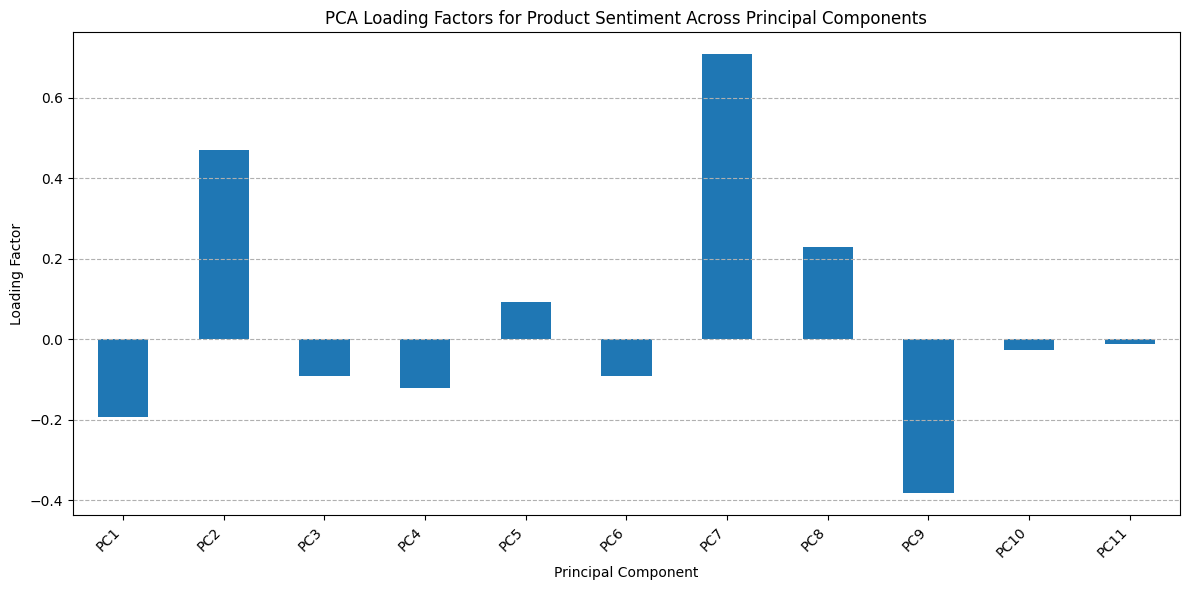

In [ ]:
import matplotlib.pyplot as plt

# Extract loading factors for 'product sentiment'
product_sentiment_loadings = loading_factors.loc['product sentiment']

# Plotting the loading factors
plt.figure(figsize=(12, 6))
product_sentiment_loadings.plot(kind='bar')
plt.title('PCA Loading Factors for Product Sentiment Across Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Loading Factor')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

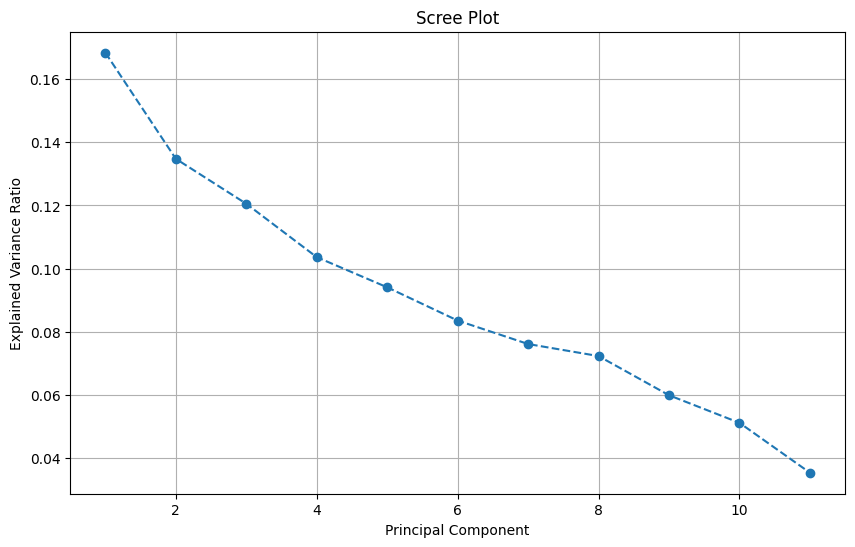

In [ ]:
import matplotlib.pyplot as plt

# Get the explained variance ratio from the PCA object
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# **GOOD ECONOMY**

In [ ]:
import pandas as pd


excel_file_path = '/content/sample_data/new good economy cw4.xlsx'
df = pd.read_excel(excel_file_path)
display(df.head())

,id,Profitability,Probability,New Probability,debt,RnD,Firm Age,Firm Size,CEO Experience,foreign sales,CEO education,CEO Gender,marketing,product sentiment,politician on board,POB catagorical
0,1,0.02,1.311883,0.026238,23.76,53.09,3.43,21.22,2,9.16,2,0,1.489985,0.284925,0.158781,0
1,2,3.99,1.394470,5.563934,41.85,45.30,3.22,21.83,4,41.42,1,0,1.398848,0.579495,0.294679,0
2,3,41.98,1.442614,60.560930,61.84,51.16,3.18,20.54,3,5.88,3,1,1.696462,0.619687,0.552742,1
3,4,8.48,1.879541,15.938509,25.61,115.49,3.26,20.59,3,11.08,2,0,1.446746,0.048441,0.909262,1
4,5,-1.94,1.416327,-2.747675,74.24,13.57,3.26,18.73,3,24.61,1,0,1.707870,0.378619,0.436101,0


In [ ]:
from sklearn.model_selection import train_test_split

# Define X and y (originally from cell 6282f3a7, included here for immediate execution)
features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'marketing', 'product sentiment', 'POB catagorical']
X = df[features]
y = df['Profitability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define X and y using the existing df['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'marketing', 'product sentiment', 'POB catagorical']['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'marketing', 'product sentiment', 'politician on board']
X = df[features]
y = df['Profitability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
display(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 117.57770125759993


'R-squared (R2) Score: -1.5534672987141973'

##Feature Importance

In [ ]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the features by importance
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Print the feature importance scores
print("Feature Importance Scores:")
display(sorted_feature_importance)

Feature Importance Scores:


,0
debt,0.307278
CEO Gender,0.155436
Firm Size,0.149664
RnD,0.112189
CEO Experience,0.051813
foreign sales,0.049517
Firm Age,0.049450
marketing,0.041063
product sentiment,0.039362
CEO education,0.029165


use all lasso

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

# Initialize LASSO model (you might need to adjust alpha)
lasso = Lasso(alpha=0.1) # alpha is the regularization strength

# Fit LASSO model
lasso.fit(X, y)

# Get the coefficients
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Identify selected features (non-zero coefficients)
selected_features_lasso = lasso_coefficients[lasso_coefficients != 0].index.tolist()

print("LASSO regularization:")
display(lasso_coefficients)

LASSO regularization:


,0
debt,-0.191736
RnD,0.030627
Firm Age,-2.792571
Firm Size,0.529006
CEO Experience,2.114485
foreign sales,-0.018773
CEO education,2.224728
CEO Gender,9.951426
marketing,-0.624973
product sentiment,-1.721407


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Define features and target
features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'marketing', 'product sentiment', 'POB catagorical']
X = df[features]
y = df['Profitability']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort features by importance
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Print feature importance scores
print("LASSO Feature Importance Scores:")
display(sorted_feature_importance)

LASSO Feature Importance Scores:


,0
debt,0.307278
CEO Gender,0.155436
Firm Size,0.149664
RnD,0.112189
CEO Experience,0.051813
foreign sales,0.049517
Firm Age,0.049450
marketing,0.041063
product sentiment,0.039362
CEO education,0.029165


**LASSO** FEATURE IMPOTANCE; GOOD ECONOMY

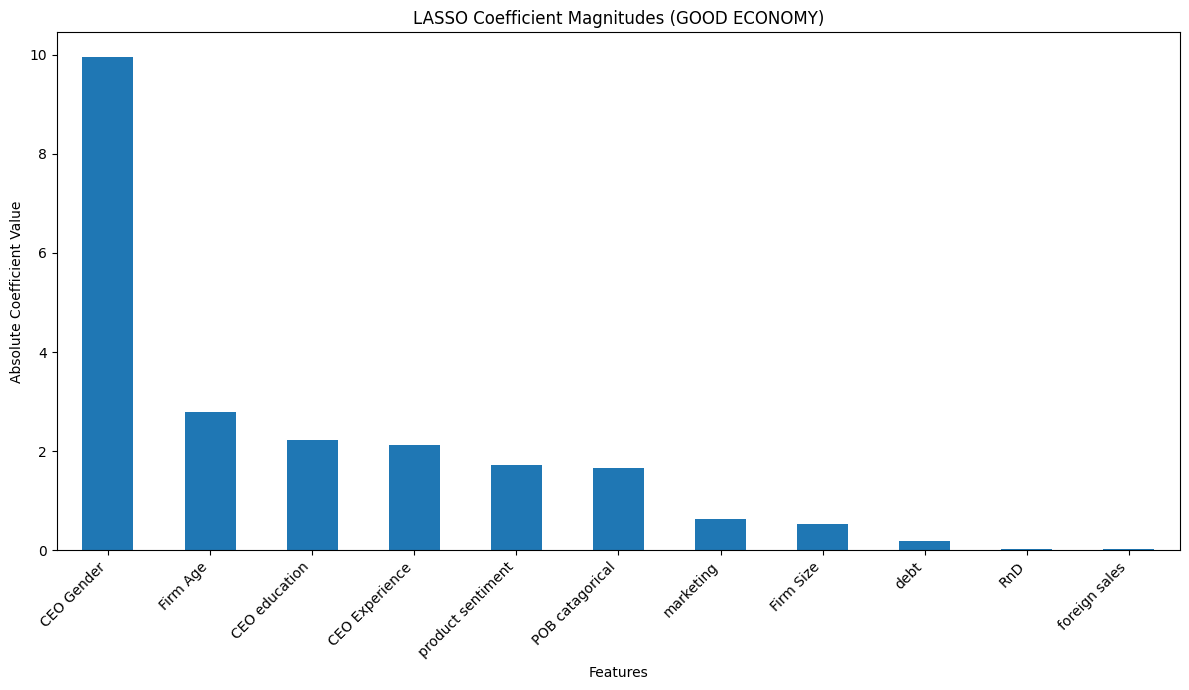

In [ ]:
import matplotlib.pyplot as plt

# Ensure lasso_coefficients is available from the 'GOOD ECONOMY' dataset (from cell UGoO74YaEZgl)
# If it's not the latest, rerun the LASSO cell for 'GOOD ECONOMY' first.

# Sort coefficients by their absolute value for better visualization
sorted_lasso_coefficients_good_economy = lasso_coefficients.abs().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sorted_lasso_coefficients_good_economy.plot(kind='bar')
plt.title('LASSO Coefficient Magnitudes (GOOD ECONOMY)')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **OLS** GOOD ECONOMY

In [ ]:
import statsmodels.api as sm

# Define features and target (as provided in the prompt, ensuring they are up-to-date)
features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'marketing', 'product sentiment', 'POB catagorical']
X = df[features]
y = df['Profitability']

# Add a constant to the independent variables for the intercept term
X_with_const = sm.add_constant(X)

# Create and fit the OLS model
ols_model = sm.OLS(y, X_with_const)
ols_results = ols_model.fit()

# Print the summary of the OLS regression results
print("OLS Regression Results:")
print(ols_results.summary())

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:          Profitability   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     3.944
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           7.79e-05
Time:                        04:41:14   Log-Likelihood:                -465.22
No. Observations:                 122   AIC:                             954.4
Df Residuals:                     110   BIC:                             988.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const         

In [ ]:
features = ['debt', 'CEO Gender']
X = df[features]
y = df['Profitability']

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Assuming RandomForest is the desired model

# Re-define features based on user's last explicit selection
features_selected = ['debt', 'CEO Gender']
X_selected = df[features_selected]
y_selected = df['Profitability']

# Split data with selected features
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42
)

# Train a model (e.g., RandomForestRegressor) with selected features
model_selected = RandomForestRegressor(random_state=42)
model_selected.fit(X_train_selected, y_train_selected)

# Make predictions with the model trained on selected features
y_pred_selected = model_selected.predict(X_test_selected)

# Calculate metrics using y_test_selected and y_pred_selected
mse_selected = mean_squared_error(y_test_selected, y_pred_selected)
r2_selected = r2_score(y_test_selected, y_pred_selected)

print(f"Mean Squared Error (MSE) with selected features: {mse_selected}")
print(f"R-squared (R2) Score with selected features: {r2_selected}")

Mean Squared Error (MSE) with selected features: 181.3776670989862
R-squared (R2) Score with selected features: -2.939028716334892


In [ ]:
# Get feature importances from the trained model with selected features
feature_importances_selected = model_selected.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_selected = pd.Series(feature_importances_selected, index=X_train_selected.columns)

# Sort the features by importance
sorted_feature_importance_selected = feature_importance_series_selected.sort_values(ascending=False)

# Print the feature importance scores
print("Feature Importance Scores (Selected Features):")
display(sorted_feature_importance_selected)

Feature Importance Scores (Selected Features):


,0
debt,0.814748
CEO Gender,0.185252


**OLS** FEATURE IMPORTANCE; GOOD ECONOMY

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Define the features for PCA
features_for_pca = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'marketing', 'product sentiment', 'POB catagorical']
X_pca = df[features_for_pca]

# Standardize the data before applying PCA
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
X_pca_result = pca.fit_transform(X_pca_scaled)

# Get the loading factors
loading_factors = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=features_for_pca)

# Print the loading factors
print("Principal Component Loading Factors:")
print(loading_factors)

Principal Component Loading Factors:
                        PC1       PC2       PC3       PC4       PC5       PC6  \
debt              -0.178182  0.051308 -0.516755  0.040603  0.071645  0.734191   
RnD                0.317158 -0.153578 -0.368961 -0.321186  0.243413 -0.300533   
Firm Age           0.384966 -0.082715 -0.054343  0.338004 -0.472248  0.196834   
Firm Size          0.298044  0.072805 -0.076829  0.604889  0.046029 -0.098204   
CEO Experience     0.329143 -0.492537  0.154569  0.286945  0.103968  0.109053   
foreign sales     -0.130636 -0.073991  0.403907  0.184546  0.644276  0.299011   
CEO education      0.408319  0.533287 -0.099803 -0.164473  0.018536  0.244240   
CEO Gender         0.423617  0.428084  0.284195 -0.087593  0.215805 -0.034642   
marketing          0.028069  0.000786  0.545909 -0.280661 -0.356113  0.332739   
product sentiment -0.221720  0.424884 -0.042339  0.353210  0.150830 -0.125564   
POB catagorical    0.330316 -0.255720 -0.102019 -0.245779  0.296813  0.1

In [ ]:
features = ['debt']
X = df[features]
y = df['Profitability']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the 'good economy' dataset
excel_file_path = '/content/sample_data/new good economy cw4.xlsx'
df_good_economy = pd.read_excel(excel_file_path)

# Define X as 'debt' and y as 'Profitability' for the good economy dataset
X_good_economy = df_good_economy[['debt']]
y_good_economy = df_good_economy['Profitability']

# Split data into training and testing sets
X_train_ge, X_test_ge, y_train_ge, y_test_ge = train_test_split(X_good_economy, y_good_economy, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model_ge = RandomForestRegressor(random_state=42)
model_ge.fit(X_train_ge, y_train_ge)

# Get feature importances from the trained model
feature_importances_ge = model_ge.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_ge = pd.Series(feature_importances_ge, index=X_train_ge.columns)

# Sort the features by importance (though with one feature, it will just be itself)
sorted_feature_importance_ge = feature_importance_series_ge.sort_values(ascending=False)

# Print the feature importance scores
print("Feature Importance Scores (Good Economy):")
display(sorted_feature_importance_ge)

Feature Importance Scores (Good Economy):


,0
debt,1.0


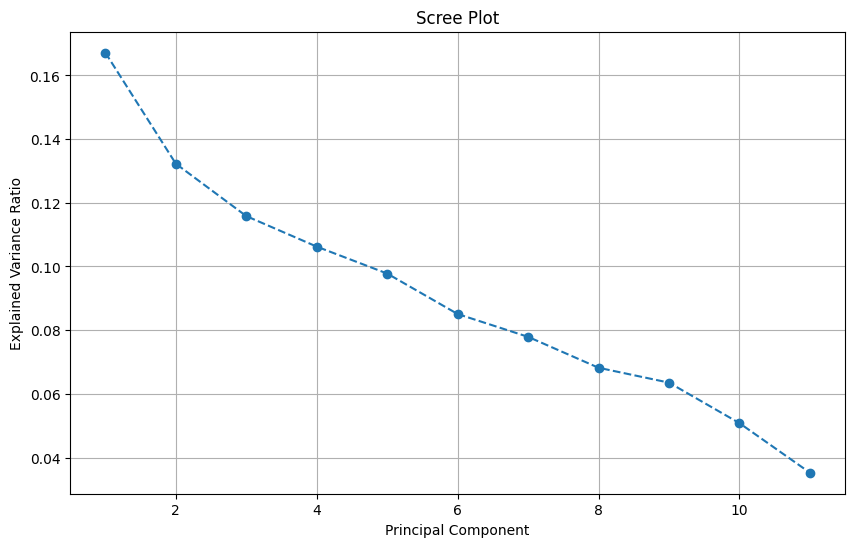

In [ ]:
import matplotlib.pyplot as plt

# Get the explained variance ratio from the PCA object
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# **HIGH INFLATION**

In [8]:
import pandas as pd

excel_file_path = '/content/new HIGH INFLATION .xlsx'
df = pd.read_excel(excel_file_path)
display(df.head())

,id,Profitability,Probability,New Profit,debt,RnD,Firm Age,Firm Size,CEO Experience,foreign sales,CEO education,CEO Gender,marketing,product sentiment,politician on board,POB catagorical
0,1,0.02,0.517467,0.010349,23.76,53.09,3.43,21.22,2,9.16,2,0,0.807493,0.284925,0.158781,0
1,2,3.99,0.155941,0.622205,41.85,45.30,3.22,21.83,4,41.42,1,0,0.902165,0.579495,0.294679,0
2,3,41.98,0.705550,29.618979,61.84,51.16,3.18,20.54,3,5.88,3,1,0.486836,0.619687,0.552742,1
3,4,8.48,0.509257,4.318501,25.61,115.49,3.26,20.59,3,11.08,2,0,0.048198,0.048441,0.909262,1
4,5,-1.94,0.942600,-1.828644,74.24,13.57,3.26,18.73,3,24.61,1,0,0.715707,0.378619,0.436101,0


In [ ]:
features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'marketing', 'product sentiment', 'POB catagorical']
X = df[features]
y = df['New Profit']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 113.0227078658897
R-squared (R2) Score: -7.102121214919704


**Feature** **Impotance**

In [ ]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the features by importance
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Print the feature importance scores
print("Feature Importance Scores:")
display(sorted_feature_importance)

Feature Importance Scores:


,0
debt,0.308645
RnD,0.116045
CEO education,0.111845
CEO Gender,0.085784
Firm Size,0.080049
CEO Experience,0.071815
foreign sales,0.068751
marketing,0.062998
product sentiment,0.038932
Firm Age,0.034812


# **LASSO** (REMOVES 0)

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

# Initialize LASSO model (you might need to adjust alpha)
lasso = Lasso(alpha=0.1) # alpha is the regularization strength

# Fit LASSO model
lasso.fit(X, y)

# Get the coefficients
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Identify selected features (non-zero coefficients)
selected_features_lasso = lasso_coefficients[lasso_coefficients != 0].index.tolist()

print("LASSO regularization:")
display(lasso_coefficients)

LASSO regularization:


,0
debt,-0.086950
RnD,0.012895
Firm Age,-1.389461
Firm Size,0.213177
CEO Experience,0.974473
foreign sales,-0.014299
CEO education,1.516373
CEO Gender,3.684202
marketing,-1.158820
product sentiment,-0.641101


**LASSO** FEATURE IMPORTANCE; HIGH INFLATION

In [ ]:
import pandas as pd

# Assuming lasso_coefficients is already available from previous execution
# If not, the following code block from Ykwf0vU0ReVd would need to be re-executed first:
# from sklearn.linear_model import Lasso
# lasso = Lasso(alpha=0.1)
# lasso.fit(X, y)
# lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Sort coefficients by their absolute value to show importance
sorted_lasso_coefficients = lasso_coefficients.abs().sort_values(ascending=False)

print("LASSO Feature Importance (Absolute Coefficients):")
display(sorted_lasso_coefficients)

LASSO Feature Importance (Absolute Coefficients):


,0
CEO Gender,3.684202
CEO education,1.516373
Firm Age,1.389461
marketing,1.158820
CEO Experience,0.974473
product sentiment,0.641101
POB catagorical,0.499598
Firm Size,0.213177
debt,0.086950
foreign sales,0.014299


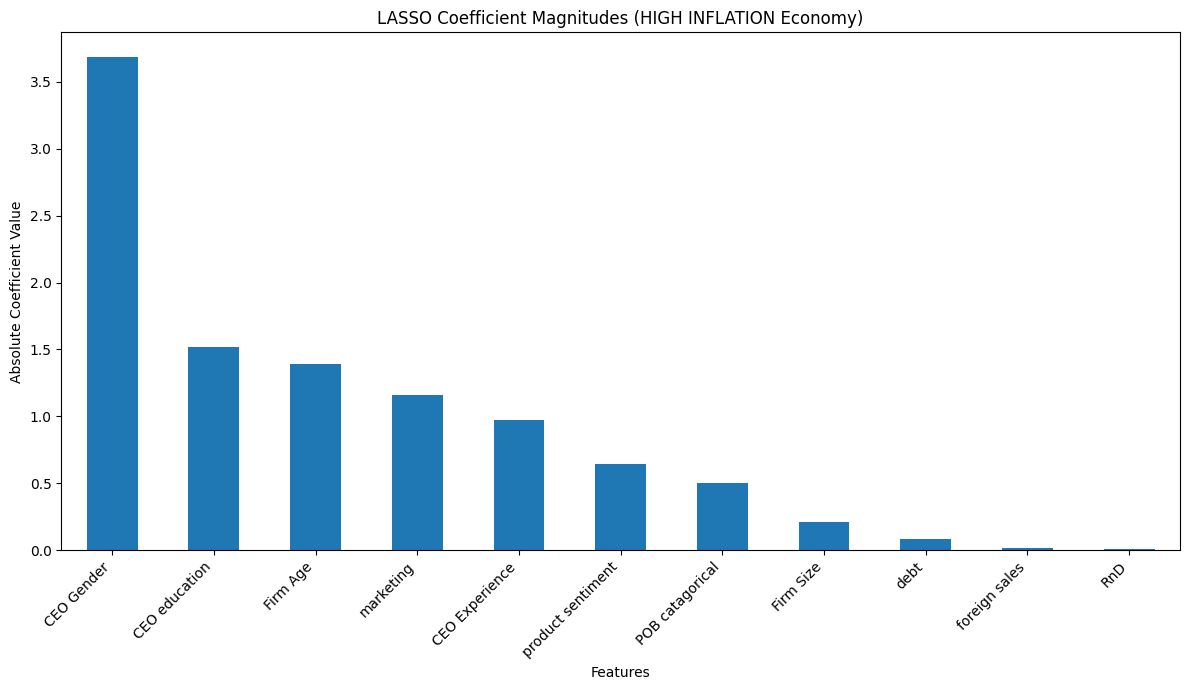

In [ ]:
import matplotlib.pyplot as plt

# Ensure lasso_coefficients is available from the 'HIGH INFLATION' dataset (from cell Ykwf0vU0ReVd)
# If it's not the latest, rerun the LASSO cell for 'HIGH INFLATION' first.

# Sort coefficients by their absolute value for better visualization
sorted_lasso_coefficients_high_inflation = lasso_coefficients.abs().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sorted_lasso_coefficients_high_inflation.plot(kind='bar')
plt.title('LASSO Coefficient Magnitudes (HIGH INFLATION Economy)')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **OLS** (UNDER 0.1)


In [ ]:
import statsmodels.api as sm

# Define features to include all relevant columns from the HIGH INFLATION data
features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'marketing', 'product sentiment', 'POB catagorical']
X = df[features]
y = df['New Profit']

# Add a constant to the independent variables for the intercept term
X_with_const = sm.add_constant(X)

# Create and fit the OLS model
ols_model = sm.OLS(y, X_with_const)
ols_results = ols_model.fit()

# Print the summary of the OLS regression results
print("OLS Regression Results for HIGH INFLATION data (all features):")
print(ols_results.summary())

OLS Regression Results for HIGH INFLATION data (all features):
                            OLS Regression Results                            
Dep. Variable:             New Profit   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     3.949
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           7.68e-05
Time:                        04:41:16   Log-Likelihood:                -375.38
No. Observations:                 122   AIC:                             774.8
Df Residuals:                     110   BIC:                             808.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [ ]:
features = ['debt', 'Firm Age', 'CEO education', 'CEO Gender']
X = df[features]
y = df['New Profit']

#**OLS Feature Importance**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Define features and target using the high inflation data
features = ['debt', 'Firm Age', 'CEO education', 'CEO Gender']
X = df[features]
y = df['New Profit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the features by importance
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Print the feature importance scores
print("Feature Importance Scores (Random Forest):")
display(sorted_feature_importance)

Feature Importance Scores (Random Forest):


,0
debt,0.562978
Firm Age,0.177304
CEO education,0.158674
CEO Gender,0.101044


**OLS** FEATURE IMPORTANCE; HIGH INFLATION

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

excel_file_path = '/content/sample_data/new HIGH INFLATION .xlsx'
df = pd.read_excel(excel_file_path)

# Define the features for PCA
features_for_pca = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'marketing', 'product sentiment', 'POB catagorical']
X_pca = df[features_for_pca]

# Standardize the data before applying PCA
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
X_pca_result = pca.fit_transform(X_pca_scaled)

# Get the loading factors
loading_factors = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=features_for_pca)

# Print the loading factors
print("Principal Component Loading Factors:")
print(loading_factors)

Principal Component Loading Factors:
                        PC1       PC2       PC3       PC4       PC5       PC6  \
debt              -0.177923  0.044797 -0.134623 -0.511190  0.680176 -0.223595   
RnD                0.338161 -0.225111 -0.316183 -0.088085  0.106434 -0.112134   
Firm Age           0.371871  0.070081  0.352216 -0.396272 -0.202079 -0.072678   
Firm Size          0.286047  0.185652  0.335974 -0.127858  0.216680  0.547803   
CEO Experience     0.335291 -0.339481  0.473167  0.050822  0.170447  0.024536   
foreign sales     -0.137295 -0.004238  0.309826  0.590360  0.465384 -0.248674   
CEO education      0.390526  0.474803 -0.324632 -0.033911  0.125882 -0.146872   
CEO Gender         0.403393  0.417310 -0.096843  0.403441 -0.036582 -0.141189   
marketing         -0.085786  0.381367  0.413092 -0.173597  0.034772 -0.417811   
product sentiment -0.233934  0.378661 -0.042496  0.052666  0.221253  0.583208   
POB catagorical    0.353962 -0.322901 -0.194617  0.098058  0.353929  0.1

# **PCA** (CHOOSE THE ONE OVER 0.7)

In [ ]:
features = ['RnD']
X = df[features]
y = df['New Profit']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the 'good economy' dataset
excel_file_path = '/content/sample_data/new HIGH INFLATION .xlsx'
df_good_economy = pd.read_excel(excel_file_path)

# Define X as 'debt' and y as 'Profitability' for the good economy dataset
X_good_economy = df_good_economy[['RnD']]
y_good_economy = df_good_economy['New Profit']

# Split data into training and testing sets
X_train_ge, X_test_ge, y_train_ge, y_test_ge = train_test_split(X_good_economy, y_good_economy, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model_ge = RandomForestRegressor(random_state=42)
model_ge.fit(X_train_ge, y_train_ge)

# Get feature importances from the trained model
feature_importances_ge = model_ge.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_ge = pd.Series(feature_importances_ge, index=X_train_ge.columns)

# Sort the features by importance (though with one feature, it will just be itself)
sorted_feature_importance_ge = feature_importance_series_ge.sort_values(ascending=False)

# Print the feature importance scores
print("Feature Importance Scores (High Inflation):")
display(sorted_feature_importance_ge)

Feature Importance Scores (High Inflation):


,0
RnD,1.0


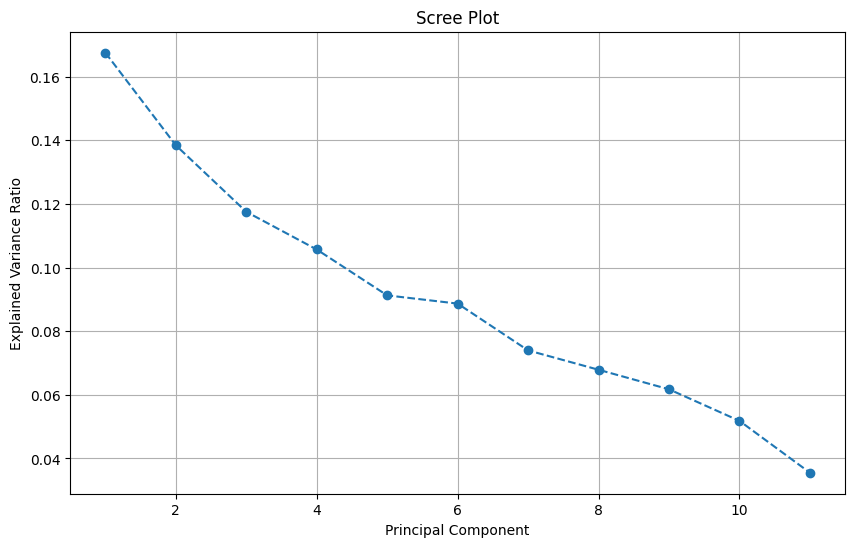

In [ ]:
import matplotlib.pyplot as plt

# Get the explained variance ratio from the PCA object
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()